<a href="https://colab.research.google.com/github/palak-oza/Codind_club_practice/blob/main/Assignmemnt1_Bouston_housing_be_regression_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset

Reference
https://inside-machinelearning.com/en/how-to-do-linear-regression-with-keras/

In [5]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [6]:
data=pd.read_csv("/content/HousingData.csv")
data.drop(columns=['ZN','CHAS'], inplace=True)
data.dropna(inplace=True)
data.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [7]:
data.dtypes

CRIM       float64
INDUS      float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(12, 12)

<Axes: >

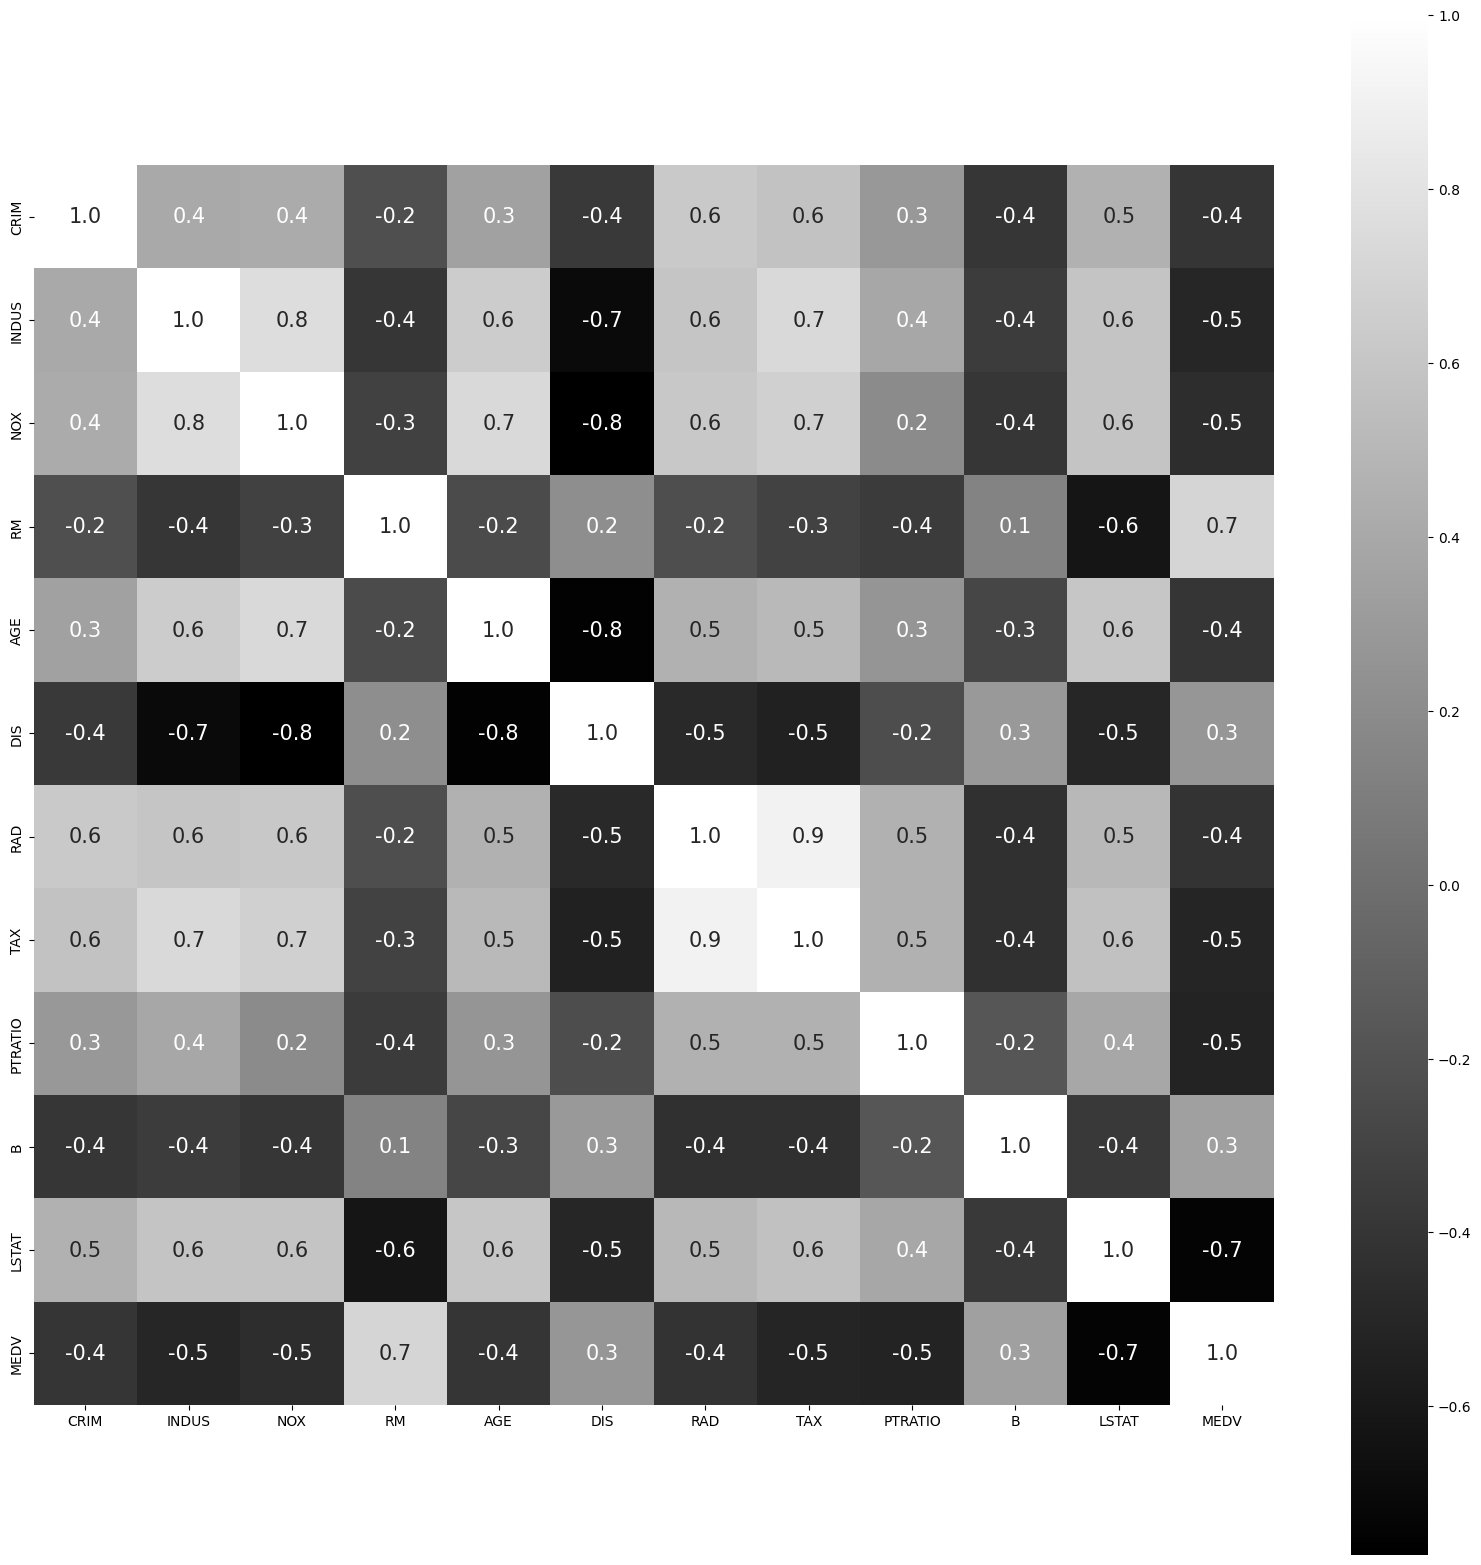

In [9]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='gray')

In [10]:
X =data.drop(['MEDV'], axis = 1)# data['area']#
y = data['MEDV']

In [11]:
X

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,9.69,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,9.69,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [12]:
X.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'B', 'LSTAT'],
      dtype='object')

In [13]:
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 427, dtype: float64

In [14]:
y.describe()

count    427.000000
mean      22.319906
std        9.063651
min        5.000000
25%       16.900000
50%       21.200000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

In [15]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [16]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the scaler and fit to training dataset, X_train
scaler = MinMaxScaler()
scaler.fit(X_train)

# Replace unscaled values with scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential, load_model

In [18]:
model = Sequential()
model.add(Dense(64, input_dim =11, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(54, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1))

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mse')

In [20]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
8/8 [==============================] - 2s 44ms/step - loss: 533.3778 - mse: 533.3778 - val_loss: 713.4352 - val_mse: 713.4352
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 520.6501 - mse: 520.6501 - val_loss: 693.3532 - val_mse: 693.3532
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 494.9235 - mse: 494.9235 - val_loss: 651.1082 - val_mse: 651.1082
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 446.4411 - mse: 446.4411 - val_loss: 568.4572 - val_mse: 568.4572
Epoch 5/200
8/8 [==============================] - 0s 10ms/step - loss: 349.5105 - mse: 349.5105 - val_loss: 418.9037 - val_mse: 418.9037
Epoch 6/200
8/8 [==============================] - 0s 12ms/step - loss: 218.2302 - mse: 218.2302 - val_loss: 245.3392 - val_mse: 245.3392
Epoch 7/200
8/8 [==============================] - 0s 9ms/step - loss: 148.6823 - mse: 148.6823 - val_loss: 199.9444 - val_mse: 199.9444
Epoch 8/200
8/8 [=====================

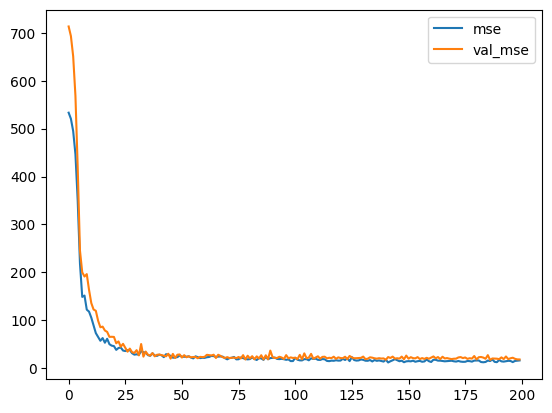

In [21]:
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')

plt.legend()

In [22]:
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Mean Squared Error : ', scores[1])

Mean Squared Error :  21.954345703125


In [23]:
Y_pred = model.predict(X_test)
Y_pred

5/5 [==============================] - 0s 4ms/step


array([[21.318604 ],
       [10.922205 ],
       [26.066727 ],
       [21.928083 ],
       [24.401012 ],
       [35.207043 ],
       [17.580471 ],
       [19.333363 ],
       [21.182127 ],
       [19.962065 ],
       [35.34844  ],
       [12.921199 ],
       [19.295393 ],
       [31.658258 ],
       [22.346453 ],
       [15.658197 ],
       [17.909735 ],
       [21.30623  ],
       [18.807512 ],
       [19.365402 ],
       [15.1485195],
       [18.141104 ],
       [15.541534 ],
       [18.574558 ],
       [20.812569 ],
       [21.506222 ],
       [23.806417 ],
       [16.51858  ],
       [17.739729 ],
       [18.481863 ],
       [24.40024  ],
       [27.408213 ],
       [10.793195 ],
       [20.114477 ],
       [32.1327   ],
       [46.765728 ],
       [19.255474 ],
       [ 9.355192 ],
       [43.235573 ],
       [22.813574 ],
       [50.26408  ],
       [19.685219 ],
       [25.341219 ],
       [21.78035  ],
       [19.176945 ],
       [24.357294 ],
       [19.423271 ],
       [19.30

In [24]:
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(y_test,Y_pred))

r2 score:  0.736294556282646


5/5 [==============================] - 0s 4ms/step


[]

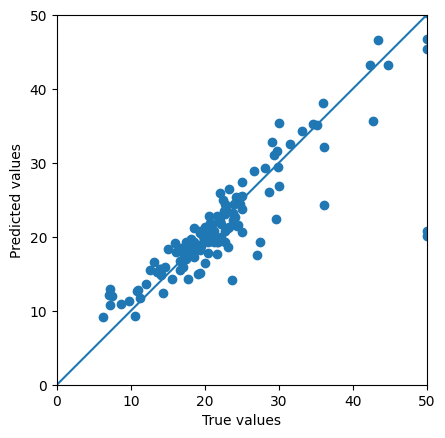

In [25]:
Y_pred = model.predict(X_test)

a = plt.axes(aspect='equal')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0,50])
plt.scatter(y_test,Y_pred)
plt.plot()

5/5 [==============================] - 0s 5ms/step


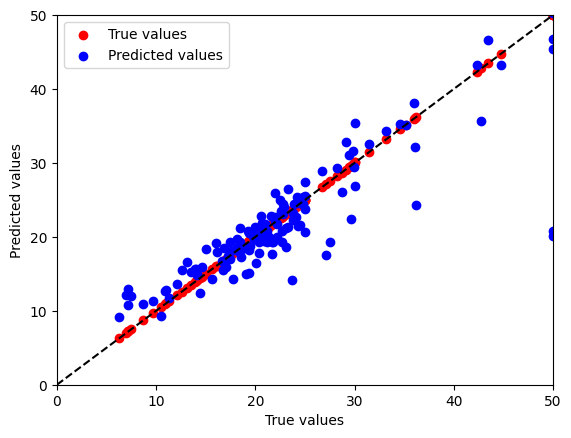

In [26]:
Y_pred = model.predict(X_test)

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0, 50], color='black', linestyle='--')  # Diagonal line for reference

# Scatter plot for y_test with red color and label
plt.scatter(y_test, y_test, color='red', label='True values')

# Scatter plot for Y_pred with blue color and label
plt.scatter(y_test, Y_pred, color='blue', label='Predicted values')

plt.legend()
plt.show()


(129,)


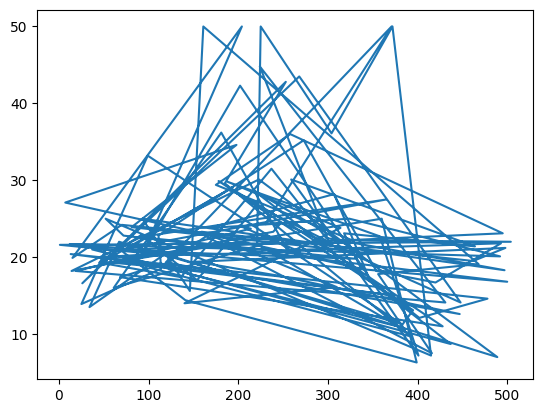

In [48]:
plt.plot(y_test)
print(y_test.shape)

(129, 1)

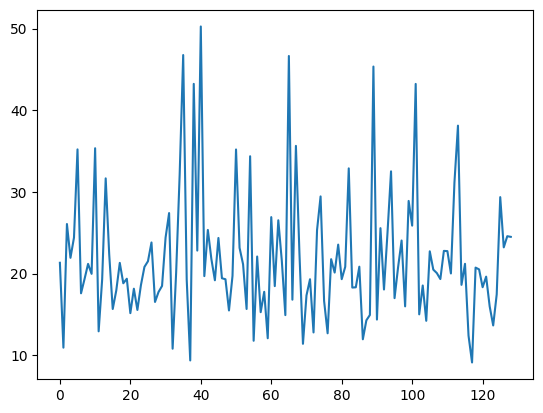

In [49]:
plt.plot(Y_pred)
Y_pred.shape

In [52]:
print("Predicted Y:")
print(Y_pred[:5])
print("Testing set Y:")
print(y_test.head())

Predicted Y:
[[21.318604]
 [10.922205]
 [26.066727]
 [21.928083]
 [24.401012]]
Testing set Y:
76     20.0
437     8.7
217    28.7
334    20.7
81     23.9
Name: MEDV, dtype: float64


Using ML MODEL lm for Linear Regression

In [30]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

In [31]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
# Value of y intercept
lm.intercept_

27.528447945190507

In [33]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-8.859309
1,INDUS,-0.078912
2,NOX,-11.176221
3,RM,23.623318
4,AGE,-0.893265
5,DIS,-14.124862
6,RAD,6.346304
7,TAX,-6.202204
8,PTRATIO,-10.169531
9,B,2.715432


In [34]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [35]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.793193909102279
Adjusted R^2: 0.7852398286831359
MAE: 2.9946143560143437
MSE: 16.825605318314622
RMSE: 4.101902646128333


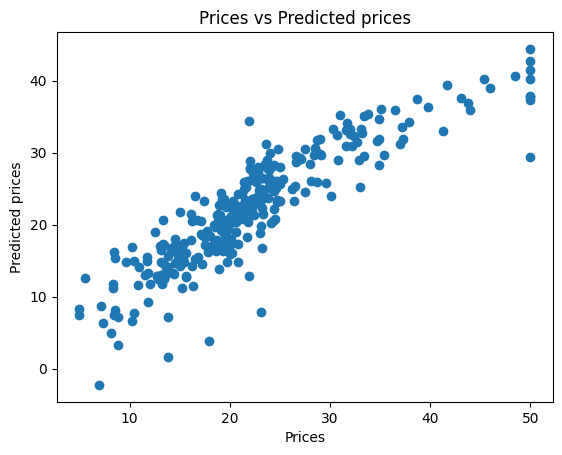

In [36]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

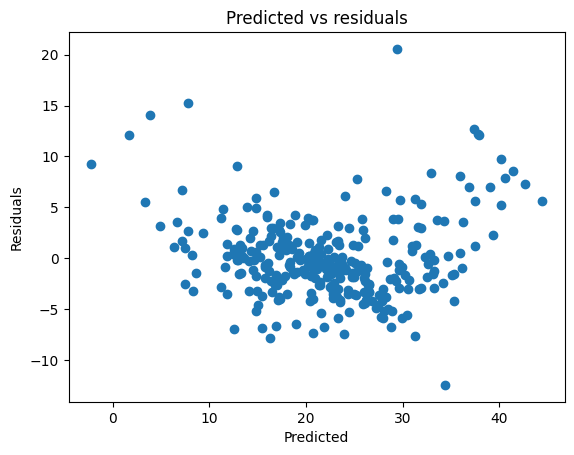

In [37]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

<ipython-input-56-c62ec83682b5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


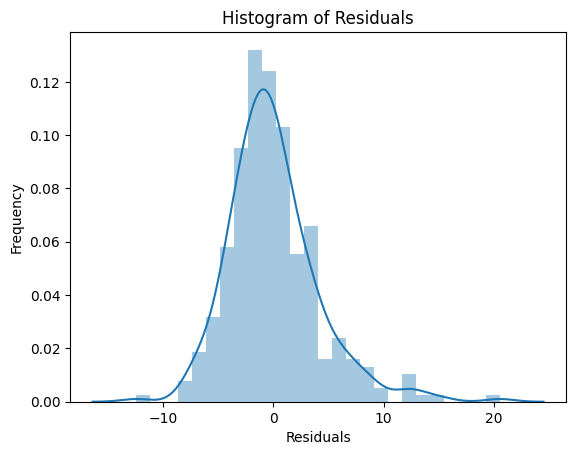

In [56]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [39]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [40]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6154022228004947
Adjusted R^2: 0.5792434574227634
MAE: 3.7210158032059137
MSE: 32.019034926491166
RMSE: 5.6585364650668435
